In [16]:
#Importando pandas
import pandas as pd


In [17]:
#Carregando dados
loja1 = pd.read_csv('../base-de-dados-challenge-1/loja_1.csv')
loja2 = pd.read_csv('../base-de-dados-challenge-1/loja_2.csv')
loja3 = pd.read_csv('../base-de-dados-challenge-1/loja_3.csv')
loja4 = pd.read_csv('../base-de-dados-challenge-1/loja_4.csv')

In [22]:
#Adicionando coluna com numero da loja
loja1['Loja'] = "Loja 1"
loja2['Loja'] = "Loja 2"
loja3['Loja'] = "Loja 3"
loja4['Loja'] = "Loja 4"
loja4.head(3)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Lava louças,eletrodomesticos,1446.46,74.604083,11/11/2022,Rafael Costa,SP,4,cartao_credito,3,-22.19,-48.79,Loja 4
1,Cama box,moveis,631.70,33.919251,03/01/2020,Thiago Silva,GO,5,cartao_credito,2,-15.98,-49.86,Loja 4
2,Bola de basquete,esporte e lazer,31.54,0.000000,25/12/2022,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 4


In [23]:
#Concatenar as lojas
lojas = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)
lojas.head(3)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1


In [29]:
lojas = lojas[["Produto","Loja","lat","lon"]]
lojas.head(2)

,Produto,Loja,lat,lon
0,Assistente virtual,Loja 1,-22.19,-48.79
1,Mesa de jantar,Loja 1,-22.25,-42.66


In [26]:
#Agora vamos obter o nome das cidades, usando os dados de "lat" e "lon"

In [35]:
#Install
#pip install geopy
#pip install geopandas shapely
#pip install geobr
#conda install -c conda-forge pyproj


import geobr
import geopandas as gpd
from shapely.geometry import Point


Obter os municipios com geor

In [38]:
municipios = geobr.read_municipality(year=2020)  # Ano mais recente disponivel
municipios.head(2)

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,1100015.0,Alta Floresta D'oeste,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.19465 -11.82746, -62.18945..."
1,1100023.0,Ariquemes,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-62.53648 -9.73222, -62.52765 ..."


In [55]:
#Criar uma copia de "lojas"
lojas = lojas.copy()

# Criar uma coluna de geometría (convertir lat/lon em pontos)
lojas['geometry'] = lojas.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

# Convertir a GeoDataFrame
glojas = gpd.GeoDataFrame(lojas, geometry='geometry')

# Definir sistema de coordenadas WGS84
glojas.set_crs(epsg=4326, inplace=True)

# 4. Garantir que municipios e glojas tem o mesmo CRS
municipios = municipios.to_crs(epsg=4326)


In [56]:
Criar join espacil
glojas = gpd.sjoin(glojas, municipios, how="left", predicate='within')


In [57]:
#Extrair cidades
glojas['Cidade'] = glojas['name_muni']

In [59]:
print(glojas[['Produto', 'Cidade']])


                    Produto                    Cidade
0        Assistente virtual                  Boracéia
1            Mesa de jantar             Nova Friburgo
2         Jogo de tabuleiro                  Brasília
3               Micro-ondas                  São Sepé
4     Cadeira de escritório           Augusto De Lima
...                     ...                       ...
9430         Mesa de jantar             Nova Friburgo
9431  Cadeira de escritório                  Custódia
9432           Copo térmico                  Boracéia
9433        Jogo de panelas  Boa Ventura De São Roque
9434         Corda de pular                  Boracéia

[9435 rows x 2 columns]


In [63]:
#Agrupar a vendas por cidade
vendas_por_cidade = glojas.groupby(['name_muni', 'Loja']).size().reset_index(name='qtd_vendas')
vendas_por_cidade.head(4)

,name_muni,Loja,qtd_vendas
0,Abaíra,Loja 1,75
1,Abaíra,Loja 2,78
2,Abaíra,Loja 3,77
3,Abaíra,Loja 4,80


In [64]:
glojas.head(4)

,Produto,Loja,lat,lon,geometry,index_right,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,Cidade
0,Assistente virtual,Loja 1,-22.19,-48.79,POINT (-48.79 -22.19),3349,3507308.0,Boracéia,35.0,SP,São Paulo,3.0,Sudeste,Boracéia
1,Mesa de jantar,Loja 1,-22.25,-42.66,POINT (-42.66 -22.25),3223,3303401.0,Nova Friburgo,33.0,RJ,Rio de Janeiro,3.0,Sudeste,Nova Friburgo
2,Jogo de tabuleiro,Loja 1,-15.83,-47.86,POINT (-47.86 -15.83),5569,5300108.0,Brasília,53.0,DF,Distrito Federal,5.0,Centro Oeste,Brasília
3,Micro-ondas,Loja 1,-30.17,-53.50,POINT (-53.5 -30.17),5018,4319604.0,São Sepé,43.0,RS,Rio Grande do Sul,4.0,Sul,São Sepé


In [67]:
glojas.columns

Index(['Produto', 'Loja', 'lat', 'lon', 'geometry', 'index_right', 'code_muni',
       'name_muni', 'code_state', 'abbrev_state', 'name_state', 'code_region',
       'name_region', 'Cidade'],
      dtype='object')

In [68]:
# Agrupar as vendas por cidade
vendas_por_cidade = glojas.groupby("Cidade").size().reset_index(name="Quantidade")
print(vendas_por_cidade.head(5))


                     Cidade  Quantidade
0                    Abaíra         310
1                  Altamira          81
2                  Alvarães          14
3           Augusto De Lima        1102
4  Boa Ventura De São Roque         473


In [117]:
# Agrupar por cidade E loja, somando as quantidades
coordenadas_cidades = glojas.groupby(["Cidade", "Loja", "lat", "lon"]).size().reset_index(name="Quantidade")


geometry = [Point(xy) for xy in zip(df_grouped["lon"], df_grouped["lat"])]
gdf_cidades = gpd.GeoDataFrame(df_grouped, geometry=geometry, crs="EPSG:4326")


NameError: name 'df_grouped' is not defined

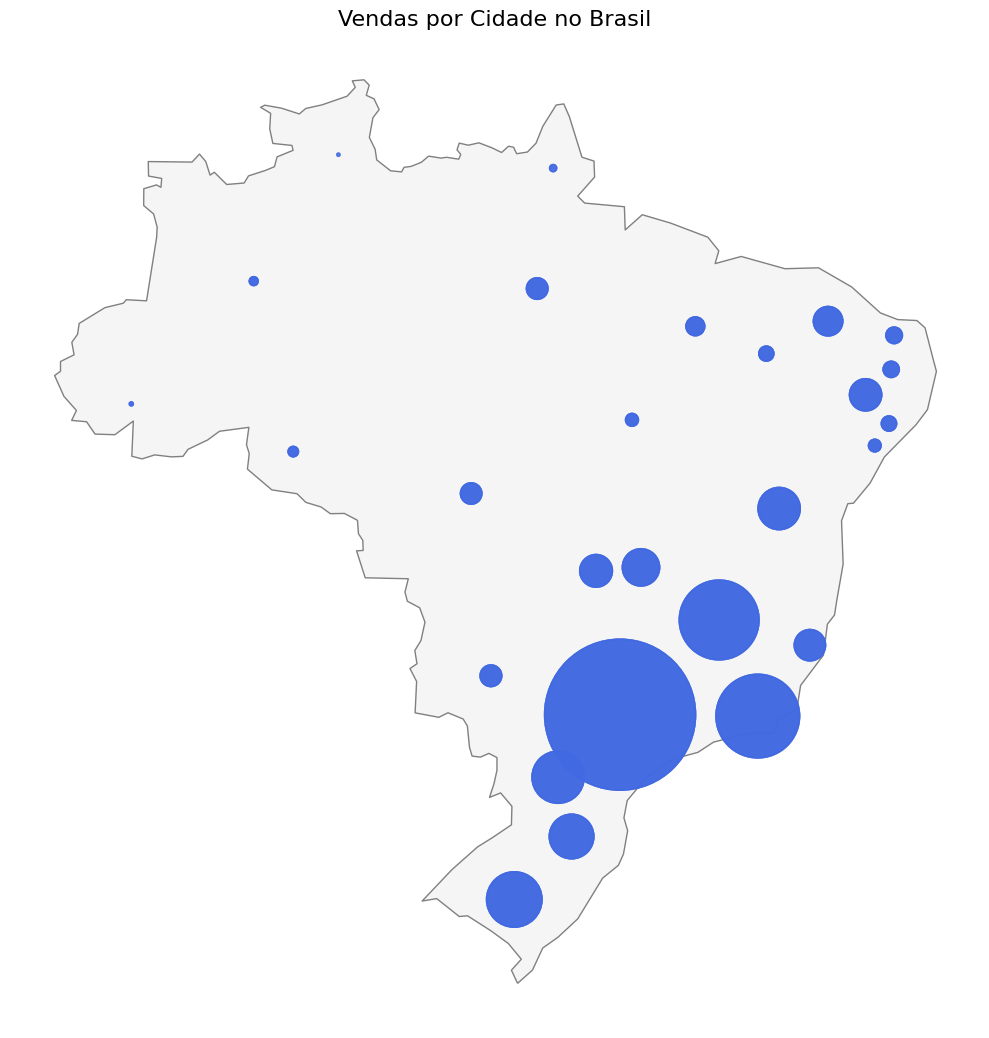

In [131]:
# Carregar o shapefile mundial
world = gpd.read_file("../Extra/110m_cultural/ne_110m_admin_0_countries.shp")

# Filtrar somente o Brasil
brasil = world[world["ADMIN"] == "Brazil"]

# Plotar o mapa com os pontos das cidades
fig, ax = plt.subplots(figsize=(10, 12))

# Mapa base do Brasil
brasil.plot(ax=ax, color="whitesmoke", edgecolor="gray")

# Plotar os pontos com tamanho proporcional à quantidade de vendas
gdf_cidades.plot(ax=ax,
                 markersize=gdf_cidades["Quantidade"] * 3,
                 color="royalblue",
                 alpha=0.6)

# Título e ajustes
plt.title("Vendas por Cidade no Brasil", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()


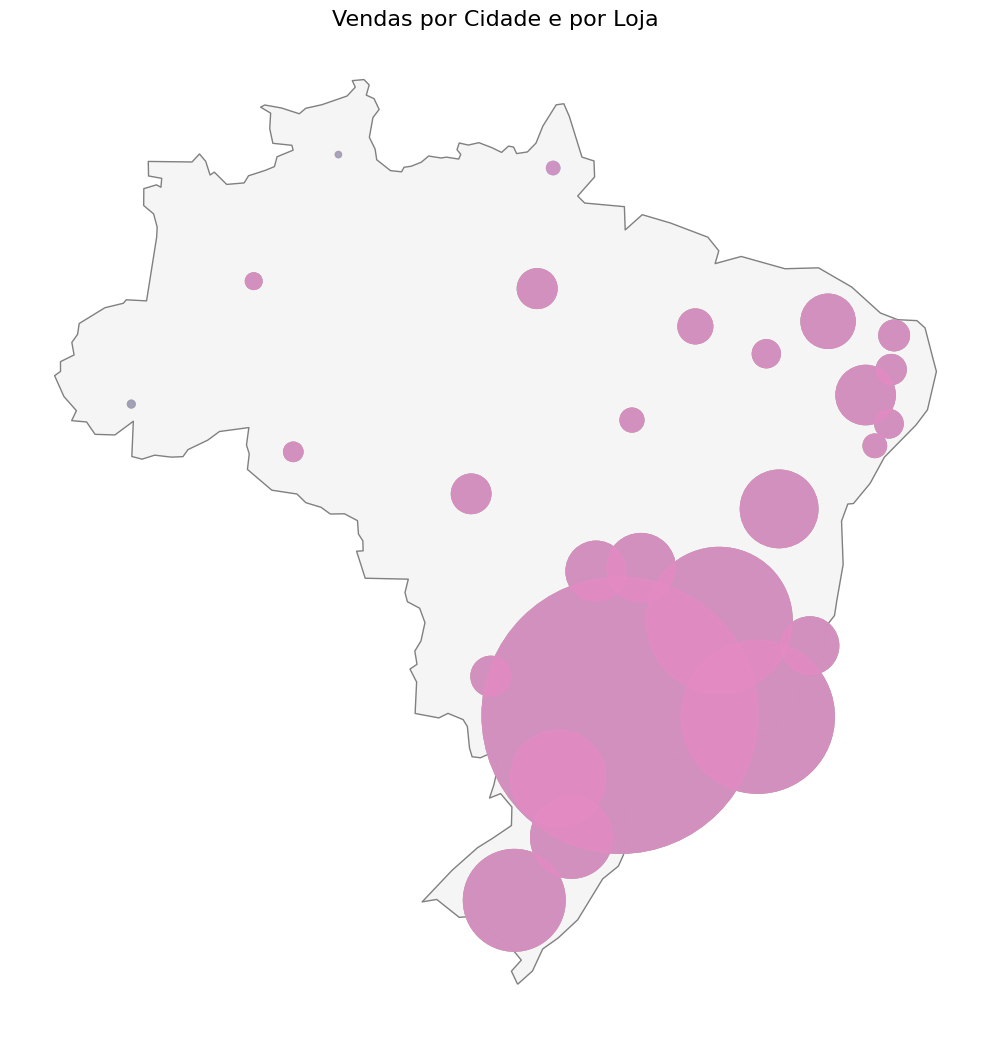

In [119]:
# Importar para paleta de cores
import seaborn as sns

# Obter uma paleta com cores diferentes para cada loja
lojas = gdf_cidades["Loja"].unique()
cores = sns.color_palette("Set2", len(lojas))
mapa_cores = dict(zip(lojas, cores))

# Plotar o mapa base
fig, ax = plt.subplots(figsize=(10, 12))
brasil.plot(ax=ax, color="whitesmoke", edgecolor="gray")

# Plotar os pontos, separando por loja
for loja in lojas:
    gdf_loja = gdf_cidades[gdf_cidades["Loja"] == loja]
    gdf_loja.plot(ax=ax,
                  markersize=gdf_loja["Quantidade"] * 10,
                  color=mapa_cores[loja],
                  label=loja,
                  alpha=0.7)

# Título e legenda
plt.title("Vendas por Cidade e por Loja", fontsize=16)
#plt.legend(title="Loja", loc="upper left")
plt.axis("off")
plt.tight_layout()
plt.show()


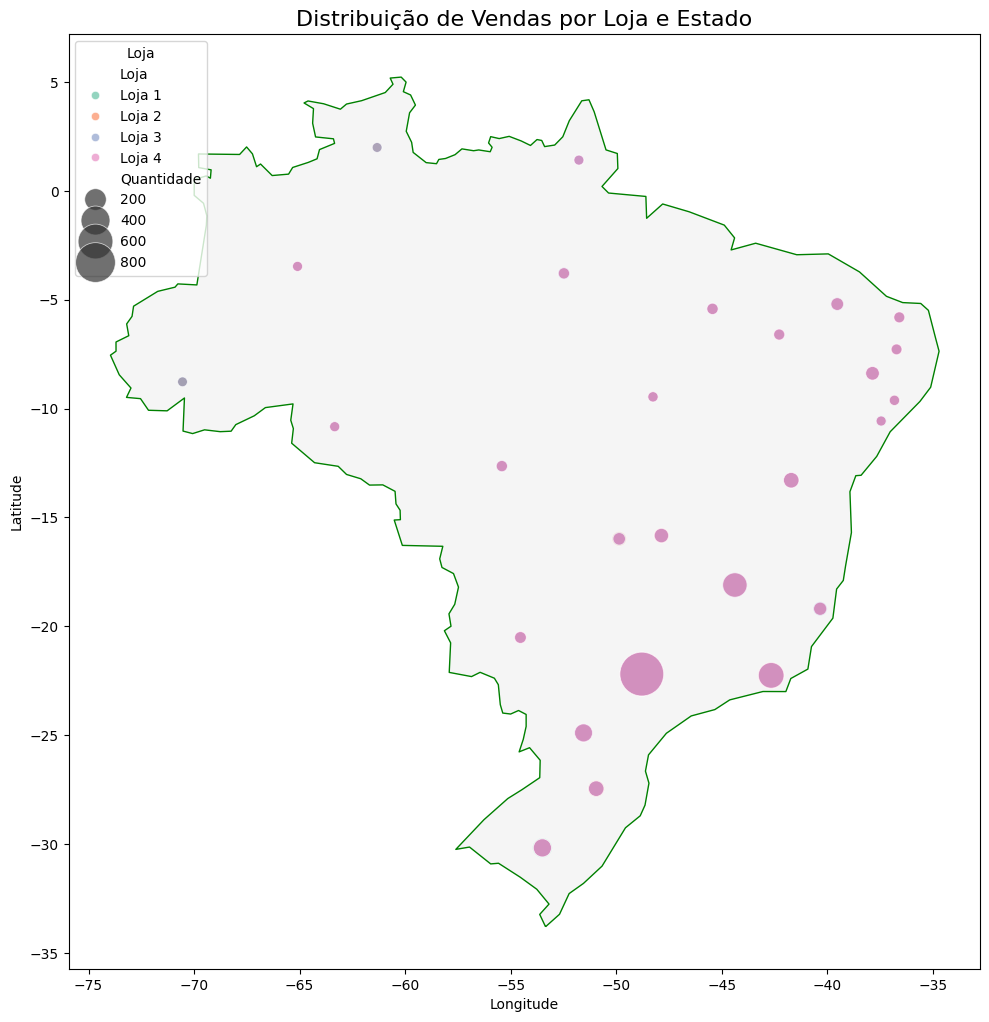

In [127]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por cidade, loja, e coordenadas (quantidade de vendas)
glojas["Quantidade"] = 1  # Criar coluna de quantidade de vendas
glojas_grouped = glojas.groupby(["name_state", "Loja", "lat", "lon"], as_index=False).agg({"Quantidade": "sum"})

# Carregar shapefile do Brasil
world = gpd.read_file("../Extra/110m_cultural/ne_110m_admin_0_countries.shp")
brasil = world[world["ADMIN"] == "Brazil"]

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 12))
brasil.plot(ax=ax, color="whitesmoke", edgecolor="green")

# Plotar pontos com seaborn (colorir por loja)
sns.scatterplot(
    data=glojas_grouped,
    x="lon",
    y="lat",
    hue="Loja",  # Colorir por loja
    size="Quantidade",
    sizes=(50, 1000),
    palette="Set2",  # Paleta com cores distintas para lojas
    alpha=0.7,
    ax=ax
)

# Título e ajustes
plt.title("Distribuição de Vendas por Loja e Estado", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Loja", loc="upper left")
plt.tight_layout()
plt.show()


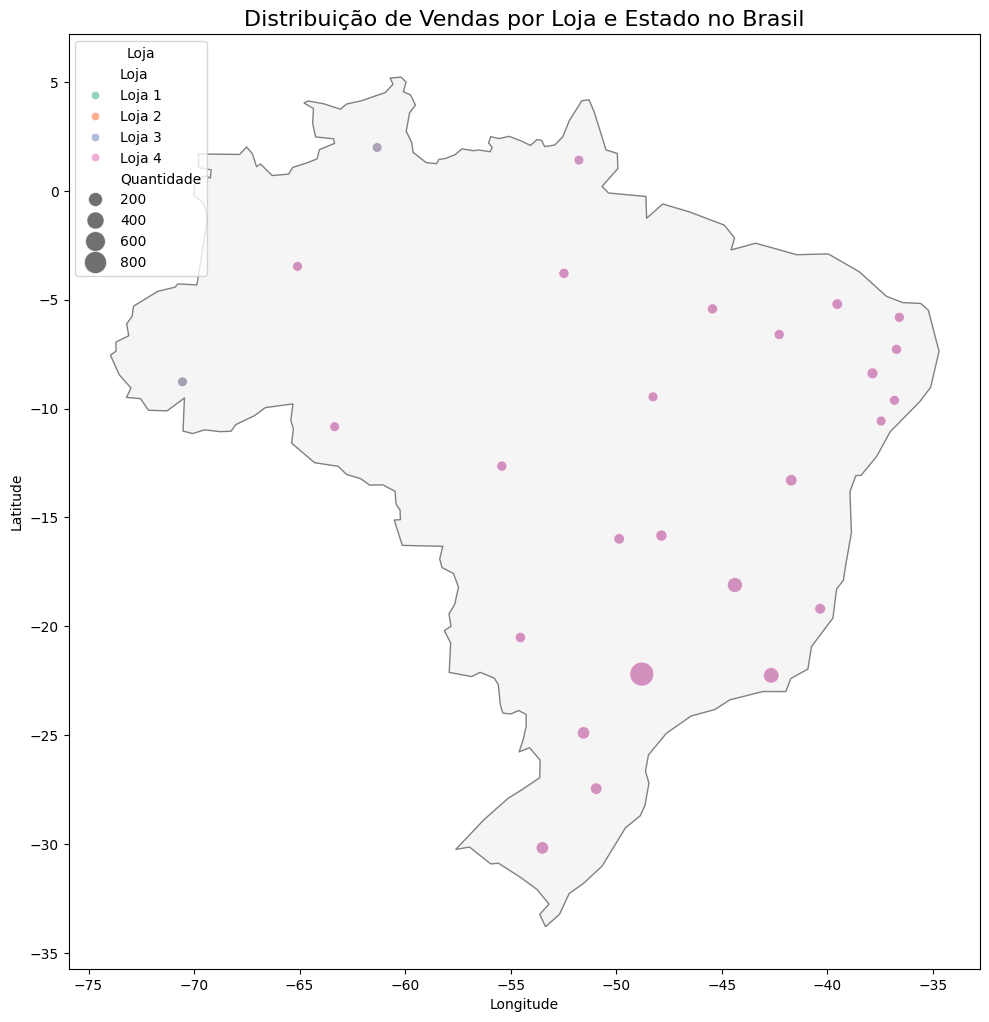

In [121]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar shapefile do Brasil (administrativo)
world = gpd.read_file("../Extra/110m_cultural/ne_110m_admin_0_countries.shp")
brasil = world[world["ADMIN"] == "Brazil"]

# Agrupar o dataframe de vendas por estado, loja, e coordenadas
glojas["Quantidade"] = 1  # Criar coluna de quantidade de vendas
glojas_grouped = glojas.groupby(["name_state", "Loja", "lat", "lon"], as_index=False).agg({"Quantidade": "sum"})

# Plotar o mapa do Brasil com detalhes de relevo e estados
fig, ax = plt.subplots(figsize=(10, 12))

# Plotar o Brasil com a cor base
brasil.plot(ax=ax, color="whitesmoke", edgecolor="gray")

# Plotar pontos de vendas por loja
sns.scatterplot(
    data=glojas_grouped,
    x="lon",
    y="lat",
    hue="Loja",  # Colorir por loja
    size="Quantidade",
    sizes=(50, 300),
    palette="Set2",  # Paleta com cores distintas para lojas
    alpha=0.7,
    ax=ax
)

# Adicionar um título
plt.title("Distribuição de Vendas por Loja e Estado no Brasil", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Loja", loc="upper left")

# Exibir o gráfico
plt.tight_layout()
plt.show()


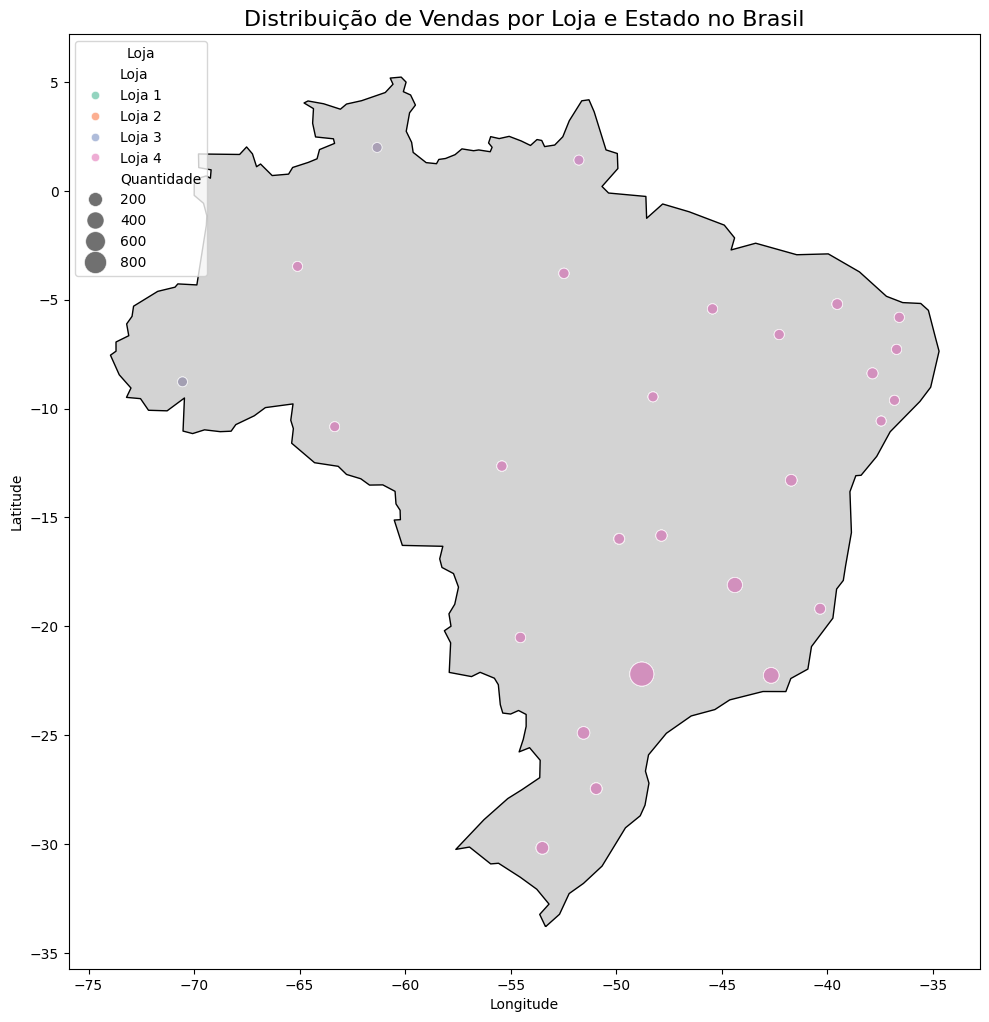

In [122]:

# Carregar shapefile do Brasil (administrativo)
world = gpd.read_file("../Extra/110m_cultural/ne_110m_admin_0_countries.shp")
brasil = world[world["ADMIN"] == "Brazil"]

# Agrupar o dataframe de vendas por estado, loja, e coordenadas
glojas["Quantidade"] = 1  # Criar coluna de quantidade de vendas
glojas_grouped = glojas.groupby(["name_state", "Loja", "lat", "lon"], as_index=False).agg({"Quantidade": "sum"})

# Plotar o mapa do Brasil com detalhes de relevo e estados
fig, ax = plt.subplots(figsize=(10, 12))

# Plotar o Brasil com a cor base (usando uma cor clara para o fundo)
brasil.plot(ax=ax, color="lightgray", edgecolor="black")

# Plotar pontos de vendas por loja
sns.scatterplot(
    data=glojas_grouped,
    x="lon",
    y="lat",
    hue="Loja",  # Colorir por loja
    size="Quantidade",
    sizes=(50, 300),  # Definir o tamanho dos pontos
    palette="Set2",  # Paleta de cores para as lojas
    alpha=0.7,  # Transparência para garantir visibilidade
    ax=ax
)

# Adicionar título e labels
plt.title("Distribuição de Vendas por Loja e Estado no Brasil", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Exibir a legenda de lojas
plt.legend(title="Loja", loc="upper left")

# Ajustar o layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()


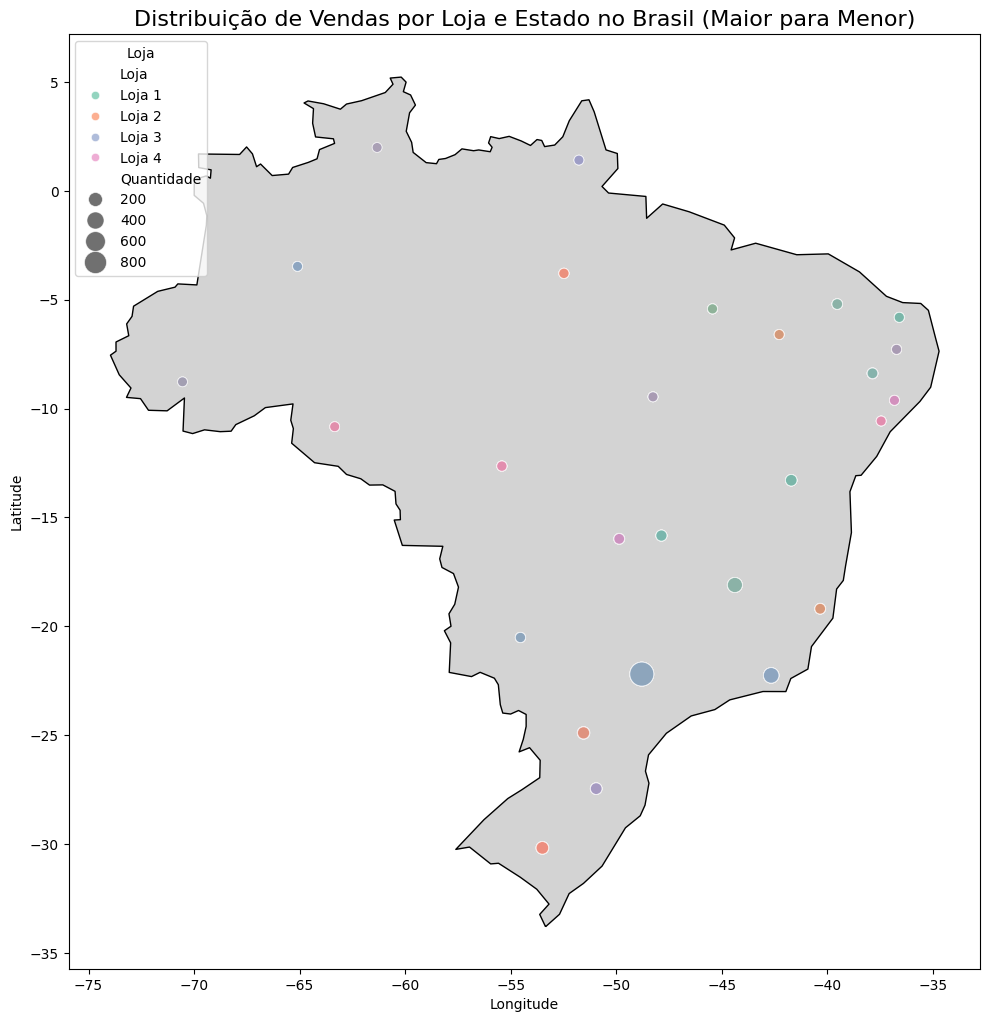

In [123]:

# Carregar shapefile do Brasil (administrativo)
world = gpd.read_file("../Extra/110m_cultural/ne_110m_admin_0_countries.shp")
brasil = world[world["ADMIN"] == "Brazil"]

# Agrupar o dataframe de vendas por estado, loja, e coordenadas
glojas["Quantidade"] = 1  # Criar coluna de quantidade de vendas
glojas_grouped = glojas.groupby(["name_state", "Loja", "lat", "lon"], as_index=False).agg({"Quantidade": "sum"})

# Ordenar as lojas dentro de cada estado por quantidade de vendas (do maior para o menor)
glojas_grouped = glojas_grouped.sort_values(by=["name_state", "Quantidade"], ascending=[True, False])

# Plotar o mapa do Brasil com detalhes de relevo e estados
fig, ax = plt.subplots(figsize=(10, 12))

# Plotar o Brasil com a cor base (usando uma cor clara para o fundo)
brasil.plot(ax=ax, color="lightgray", edgecolor="black")

# Plotar pontos de vendas por loja, com a maior loja de vendas acima
sns.scatterplot(
    data=glojas_grouped,
    x="lon",
    y="lat",
    hue="Loja",  # Colorir por loja
    size="Quantidade",
    sizes=(50, 300),  # Definir o tamanho dos pontos
    palette="Set2",  # Paleta de cores para as lojas
    alpha=0.7,  # Transparência para garantir visibilidade
    ax=ax
)

# Adicionar título e labels
plt.title("Distribuição de Vendas por Loja e Estado no Brasil (Maior para Menor)", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Exibir a legenda de lojas
plt.legend(title="Loja", loc="upper left")

# Ajustar o layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()


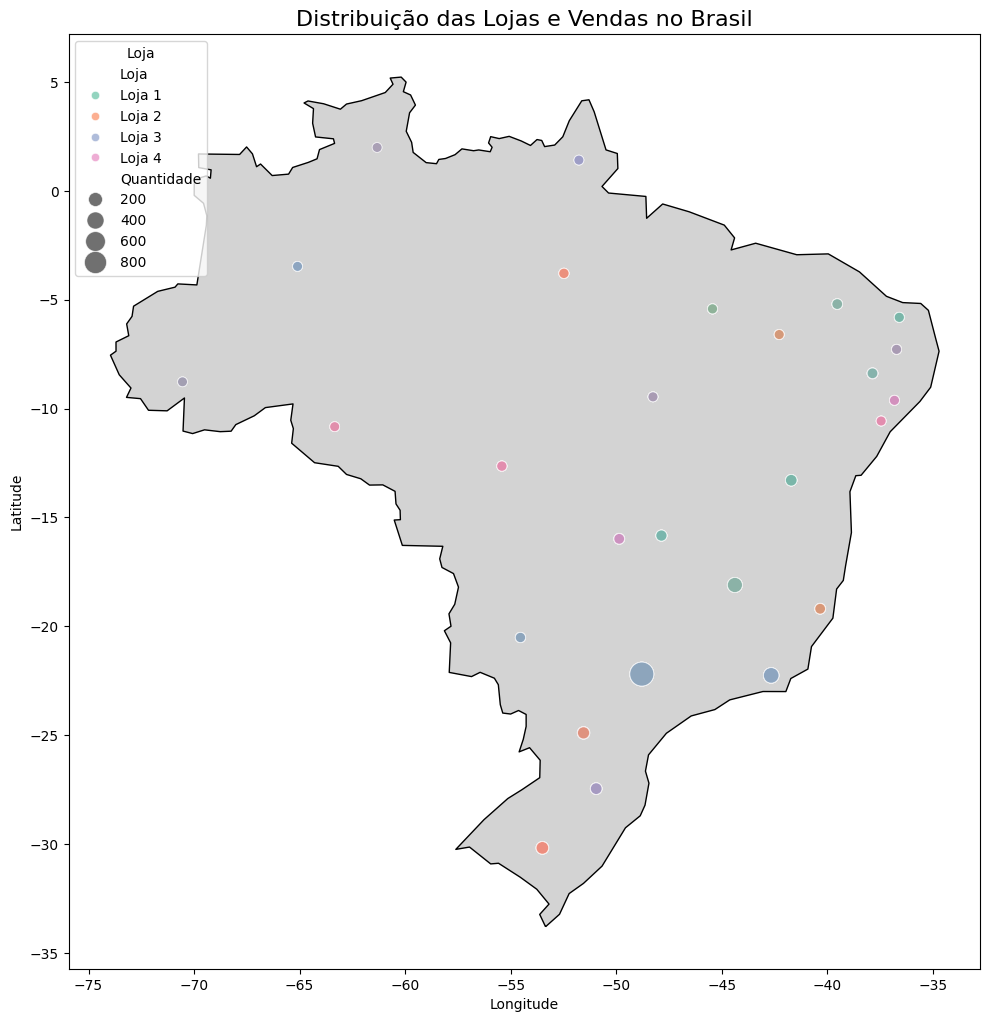

In [124]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar shapefile do Brasil (administrativo)
world = gpd.read_file("../Extra/110m_cultural/ne_110m_admin_0_countries.shp")
brasil = world[world["ADMIN"] == "Brazil"]

# Agrupar o dataframe de vendas por estado, loja, e coordenadas
glojas["Quantidade"] = 1  # Criar coluna de quantidade de vendas
glojas_grouped = glojas.groupby(["name_state", "Loja", "lat", "lon"], as_index=False).agg({"Quantidade": "sum"})

# Ordenar as lojas dentro de cada estado por quantidade de vendas (do maior para o menor)
glojas_grouped = glojas_grouped.sort_values(by=["name_state", "Quantidade"], ascending=[True, False])

# Plotar o mapa do Brasil com detalhes de relevo e estados
fig, ax = plt.subplots(figsize=(10, 12))

# Plotar o Brasil com a cor base (usando uma cor clara para o fundo)
brasil.plot(ax=ax, color="lightgray", edgecolor="black")

# Plotar gráfico de dispersão com a cor e o tamanho dos pontos representando as lojas e vendas
sns.scatterplot(
    data=glojas_grouped,
    x="lon",
    y="lat",
    hue="Loja",  # Colorir por loja
    size="Quantidade",
    sizes=(50, 300),  # Tamanho do ponto varia conforme a quantidade de vendas
    palette="Set2",  # Paleta de cores para as lojas
    alpha=0.7,  # Transparência para visibilidade
    ax=ax
)

# Adicionar título e labels
plt.title("Distribuição das Lojas e Vendas no Brasil", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Exibir a legenda de lojas
plt.legend(title="Loja", loc="upper left")

# Ajustar o layout para melhor visualização
plt.tight_layout()

# Exibir o gráfico
plt.show()


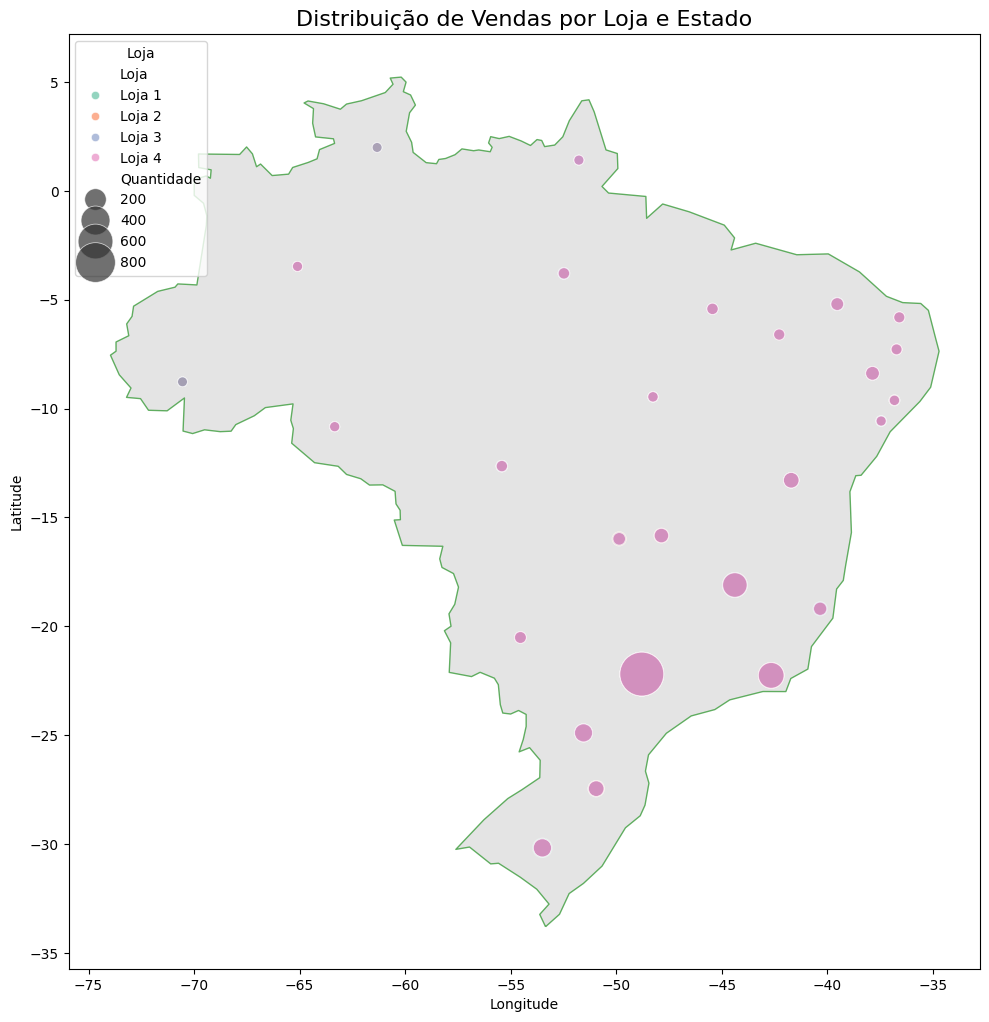

In [128]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por cidade, loja, e coordenadas (quantidade de vendas)
glojas["Quantidade"] = 1  # Criar coluna de quantidade de vendas
glojas_grouped = glojas.groupby(["name_state", "Loja", "lat", "lon"], as_index=False).agg({"Quantidade": "sum"})

# Carregar shapefile do Brasil
world = gpd.read_file("../Extra/110m_cultural/ne_110m_admin_0_countries.shp")
brasil = world[world["ADMIN"] == "Brazil"]

# Plotar o mapa
fig, ax = plt.subplots(figsize=(10, 12))
brasil.plot(ax=ax, color="lightgray", edgecolor="green", alpha=0.6)  # Usando uma cor mais suave e transparência

# Plotar pontos com seaborn (colorir por loja)
sns.scatterplot(
    data=glojas_grouped,
    x="lon",
    y="lat",
    hue="Loja",  # Colorir por loja
    size="Quantidade",
    sizes=(50, 1000),
    palette="Set2",  # Paleta com cores distintas para lojas
    alpha=0.7,  # Opacidade para garantir que o mapa seja visível no fundo
    ax=ax
)

# Título e ajustes
plt.title("Distribuição de Vendas por Loja e Estado", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Loja", loc="upper left")
plt.tight_layout()

# Exibir o gráfico
plt.show()
